### 3.1.4 선형 회귀

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/weather.csv')

dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


### Shuffle

In [3]:
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state=2)

dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
269,7/27/2008,Canberra,-2.3,9.7,0.0,1.4,1.9,SSE,28.0,SSE,...,66,1013.8,1010.0,7,7,1.0,7.8,No,1.4,Yes
28,11/29/2007,Canberra,15.1,24.3,0.0,7.0,0.4,SE,39.0,SE,...,80,1019.0,1017.1,7,7,18.9,19.7,No,0.4,No
20,11/21/2007,Canberra,15.3,33.4,0.0,8.8,9.5,WNW,59.0,N,...,26,1012.4,1006.5,1,5,22.2,32.8,No,0.4,No
141,3/21/2008,Canberra,13.0,14.8,0.0,8.2,0.0,SE,30.0,ESE,...,62,1017.4,1019.3,7,8,13.3,13.9,No,0.0,No
198,5/17/2008,Canberra,7.9,12.3,1.0,1.8,1.7,NW,52.0,NNW,...,78,1006.3,1005.9,7,7,11.3,7.3,No,0.8,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 269 to 168
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Location       366 non-null    object 
 2   MinTemp        366 non-null    float64
 3   MaxTemp        366 non-null    float64
 4   Rainfall       366 non-null    float64
 5   Evaporation    366 non-null    float64
 6   Sunshine       363 non-null    float64
 7   WindGustDir    363 non-null    object 
 8   WindGustSpeed  364 non-null    float64
 9   WindDir9am     335 non-null    object 
 10  WindDir3pm     365 non-null    object 
 11  WindSpeed9am   359 non-null    float64
 12  WindSpeed3pm   366 non-null    int64  
 13  Humidity9am    366 non-null    int64  
 14  Humidity3pm    366 non-null    int64  
 15  Pressure9am    366 non-null    float64
 16  Pressure3pm    366 non-null    float64
 17  Cloud9am       366 non-null    int64  
 18  Cloud3pm

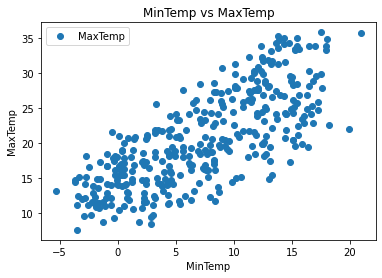

In [5]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp') 
plt.show()

### Split Train/Test dataset

In [6]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,17.6,21.503765
1,15.5,14.206335
2,18.3,18.155533
3,21.6,13.948779
4,11.6,16.438490
...,...,...
69,23.3,18.928202
70,12.4,19.357462
71,28.6,25.281259
72,20.6,15.579969


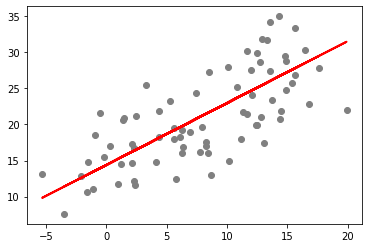

In [8]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [9]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.06841436853932
RMSE: 4.479778383864465


### cross_val_score

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

import numpy as np
rmse = np.sqrt(-scores)

print('Avg. RMSE: %0.2f' % (rmse.mean()))

Avg. RMSE: 4.41


### Evaluation

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

reg_mse = mean_squared_error(y_test, y_pred)
reg_rmse = np.sqrt(reg_mse)

print('RMSE: %0.2f' % (reg_rmse))

RMSE: 4.48
